In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [8]:
data = datasets.load_iris() # vraca objekat koji sadrzi:
# data -> NumPy niz koji sadrzi vrednosti atributa
# target -> NumPy niz koji sadrži klase
# feature_names -> Lista imena atributa

columns = np.array(data.feature_names)
print(columns)
X = data.data 
print(X.shape)
y = data.target
print(y.shape)

data_values = np.concatenate((X, y.reshape((y.shape[0], 1))), axis=1)
iris_df = pd.DataFrame(data=data_values, columns=[col for col in columns] + ['class'])

['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
(150, 4)
(150,)


In [9]:
#Pearsonov koeficijent korelacije - ukazuje na jačinu i pravac veze između atributa.
correlation = iris_df['sepal length (cm)'].corr(iris_df['sepal width (cm)'])
print(correlation)

-0.11756978413300208


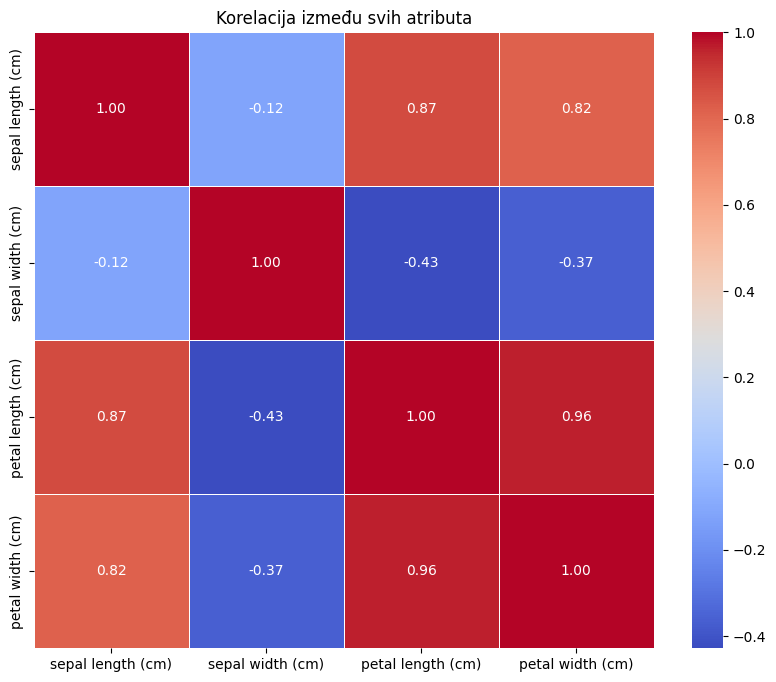

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_selected = iris_df[columns]
correlation_matrix = df_selected.corr() #Izracunava korelaciju izmedju svih kolona

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)# annot=True -> sluzi za prikaz brojeva

plt.title('Korelacija između svih atributa')
plt.show()

In [11]:
#PCA -  ortogonalnu linearnu transformaciju
from sklearn.decomposition import PCA

In [12]:
#preduslov - da atributi imaju prosek 0 jer PCA traži pravce kroz centar mase podataka
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = columns)
X_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [13]:
pca = PCA() #n_componennts = broj/procenat/None nije postavljen broj komponenti, tako da automatski trazi sve
X_pca = pca.fit_transform(X_scaled) # rezultat su projektovani podaci

In [14]:
pca_names = [f'PC{i+1}' for i in range(pca.explained_variance_ratio_.shape[0])]
df_X_pca = pd.DataFrame(X_pca, columns = pca_names)
df_X_pca

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,0.127706,-0.024168
1,-2.080961,-0.674134,0.234609,-0.103007
2,-2.364229,-0.341908,-0.044201,-0.028377
3,-2.299384,-0.597395,-0.091290,0.065956
4,-2.389842,0.646835,-0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,-0.256274,-0.389257
146,1.564580,-0.896687,0.026371,-0.220192
147,1.521170,0.269069,-0.180178,-0.119171
148,1.372788,1.011254,-0.933395,-0.026129


In [15]:
explained_vars = zip(pca_names, pca.explained_variance_ratio_)
for el in explained_vars:
    print(f'{el[0]}: {round(el[1] * 100, 2)}%')

PC1: 72.96%
PC2: 22.85%
PC3: 3.67%
PC4: 0.52%


In [16]:
pca.components_ # i-ti red je PCi komponenta - i=0 PC0 = 0.52*sepal_len + (-0.26)*sepal_width + ...

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [ 0.71956635, -0.24438178, -0.14212637, -0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

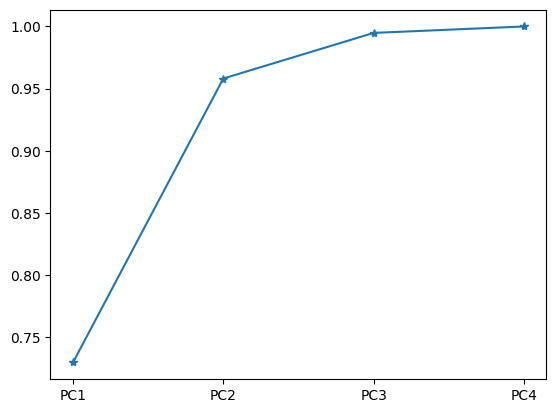

In [17]:
from matplotlib import pyplot as plt
cumsum_variancw_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca_names, cumsum_variancw_ratio, marker = '*')

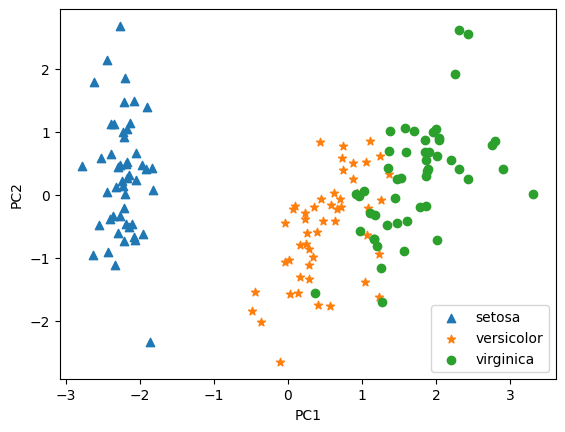

In [18]:
irisDF_pca = pd.DataFrame(X_pca, columns = pca_names)
irisDF_pca['class'] = y
markers = ['^', '*', 'o']
target_names = ['setosa', 'versicolor', 'virginica']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['class'] == i]['PC1']
    y_axis_data = irisDF_pca[irisDF_pca['class'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [19]:
# LDA - traze se prave koje najbolje razdvajaju klase - nadgledano ucenje

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() # n_components
X_lda = lda.fit_transform(X_scaled, y)
print(lda.explained_variance_ratio_)



[0.9912126 0.0087874]


In [20]:
lda_names = [f'LDA{i+1}' for i in range(lda.explained_variance_ratio_.shape[0])]


In [21]:
explained_vars = zip(lda_names, lda.explained_variance_ratio_)
for el in explained_vars:
    print(f'{el[0]}: {round(el[1] * 100, 2)}%')

LDA1: 99.12%
LDA2: 0.88%


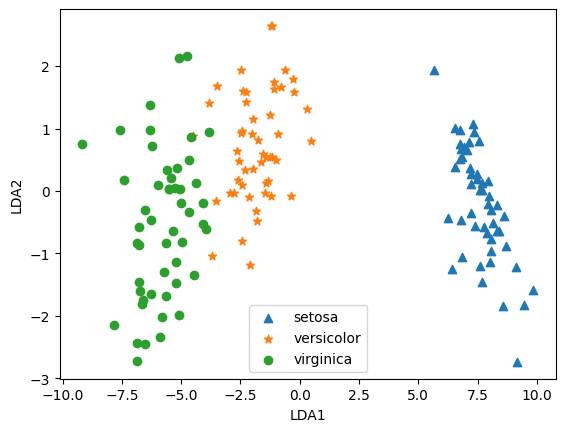

In [22]:
irisDF_lda = pd.DataFrame(X_lda, columns = lda_names)
irisDF_lda['class'] = y
markers = ['^', '*', 'o']
target_names = ['setosa', 'versicolor', 'virginica']
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['class'] == i]['LDA1']
    y_axis_data = irisDF_lda[irisDF_lda['class'] == i]['LDA2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label = target_names[i])

plt.legend()
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.show()

In [44]:
#t-SNE
from sklearn.manifold import TSNE
# Testirati kombinacije parametara:
# * perplexity=30, max_iter=1000
# * perplexity=30, max_iter=250
# * perplexity=5, max_iter=1000
# * perplexity=150, max_iter=1000

tsne = TSNE(n_components=2, perplexity=5, max_iter=1000, learning_rate='auto', init='random') #moze se postaviti i random state parametar kako za isti perplexity ne bismo dobijali razlicite slike
X_tsne = tsne.fit_transform(X)

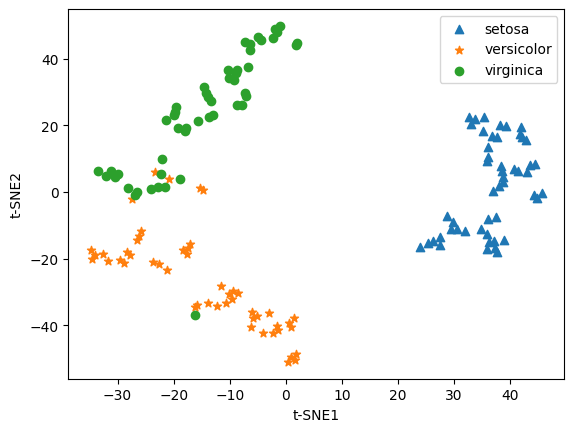

In [45]:
irisDF_tsne = pd.DataFrame(X_tsne, columns = ['TSNE1', 'TSNE2'])
irisDF_tsne['class'] = y
markers = ['^', '*', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_tsne[irisDF_tsne['class'] == i]['TSNE1']
    y_axis_data = irisDF_tsne[irisDF_tsne['class'] == i]['TSNE2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=target_names[i])

plt.legend()
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

https://www.youtube.com/watch?v=NEaUSP4YerM&t=270s


https://www.youtube.com/watch?v=Bl85EfTiGj0

In [25]:
#SVD
from sklearn.decomposition import TruncatedSVD
from sklearn.utils.extmath import randomized_svd

In [26]:
svd = TruncatedSVD() # Izdvaja U komponentu iz X = U * sigma * V^T
X_svd = svd.fit_transform(X_scaled)

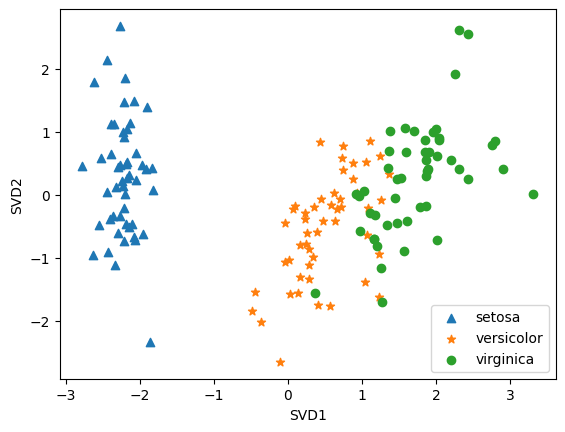

In [27]:
irisDF_svd = pd.DataFrame(X_svd, columns = ['SVD1', 'SVD2'])
irisDF_svd['class'] = y
markers = ['^', '*', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_svd[irisDF_svd['class'] == i]['SVD1']
    y_axis_data = irisDF_svd[irisDF_svd['class'] == i]['SVD2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=target_names[i])

plt.legend()
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()

In [28]:
# II nacin
X_svd_r = randomized_svd(X_scaled, n_components=2, random_state=0) # Izdvaja sve komponente SVD transformacije
[U, s, V_t] = X_svd_r

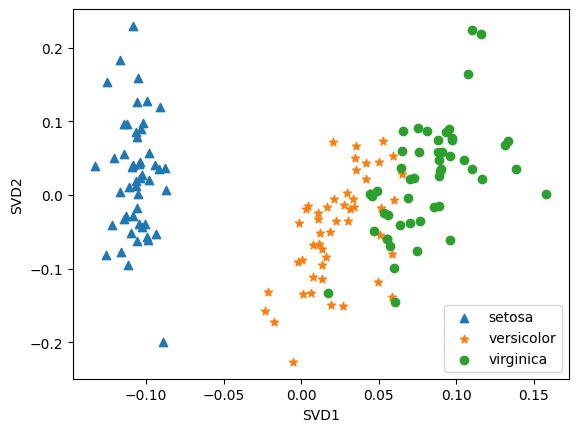

In [29]:
#U: Koristite za vizualizaciju smanjenih podataka u 2D prostoru.
#s: Koristite za analizu važnosti svake komponente
#V_t: Možete koristiti za analizu odnosa između osobina i komponenti.
# Možete koristiti U, s, i V_t da rekonstruisete originalne podatke i analizirate koliko je dekompozicija tačna

irisDF_svd_r = pd.DataFrame(U, columns = ['SVD1', 'SVD2'])
irisDF_svd_r['class'] = y
markers = ['^', '*', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_svd_r[irisDF_svd_r['class'] == i]['SVD1']
    y_axis_data = irisDF_svd_r[irisDF_svd_r['class'] == i]['SVD2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=target_names[i])

plt.legend()
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.show()
#paznja: skale na kojima se prikazuju
# Truncated kojirsti tacan algoritam za singularnu dekompoziciju
# randomized_svd koristi aproksimaciju za izračunavanje SVD (stohasticke metode) -može da generiše približne komponente koje mogu biti slične, ali ne nužno identične kao kod tačnog SVD

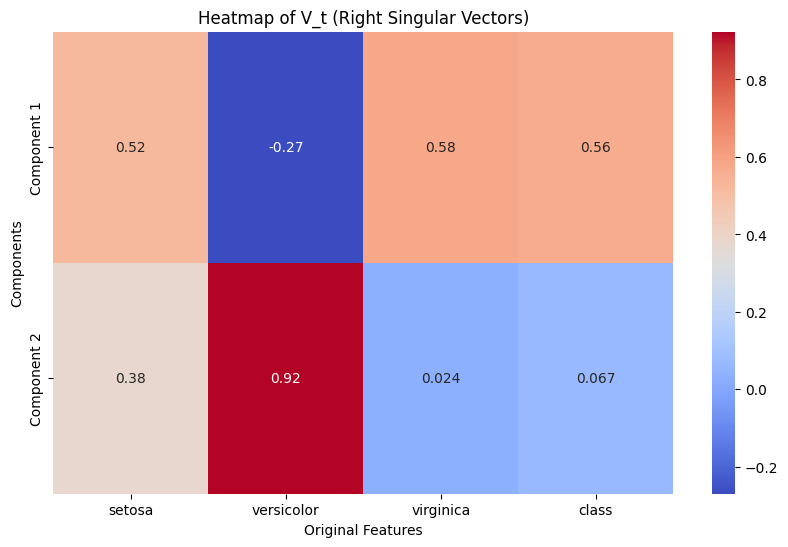

In [30]:
#Kolone u V_t predstavljaju kako svaka osobina doprinosi svakoj komponenti
import seaborn as sns
import matplotlib.pyplot as plt

# V_t je matrica dimenzija (2, n_features)
plt.figure(figsize=(10, 6))  
sns.heatmap(V_t, annot=True, cmap="coolwarm", xticklabels=target_names + ['class'], yticklabels=["Component 1", "Component 2"])
plt.title("Heatmap of V_t (Right Singular Vectors)")
plt.xlabel("Original Features")
plt.ylabel("Components")
plt.show()


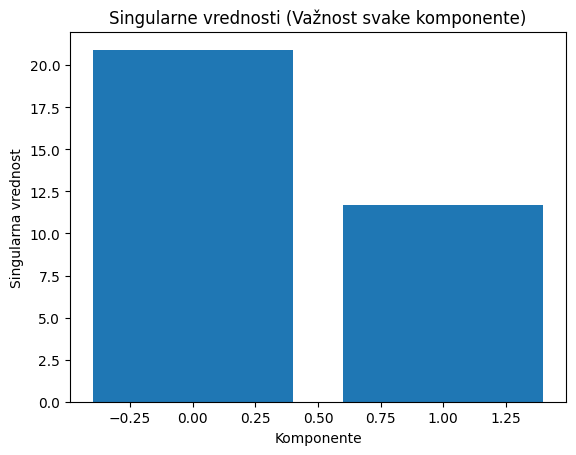

In [31]:
# s
import matplotlib.pyplot as plt

# Pretpostavljamo da ste već dobili singularne vrednosti iz SVD (npr. s iz randomized_svd)
plt.bar(range(len(s)), s)  # Prikazivanje singularnih vrednosti
plt.xlabel('Komponente')
plt.ylabel('Singularna vrednost')
plt.title('Singularne vrednosti (Važnost svake komponente)')
plt.show()


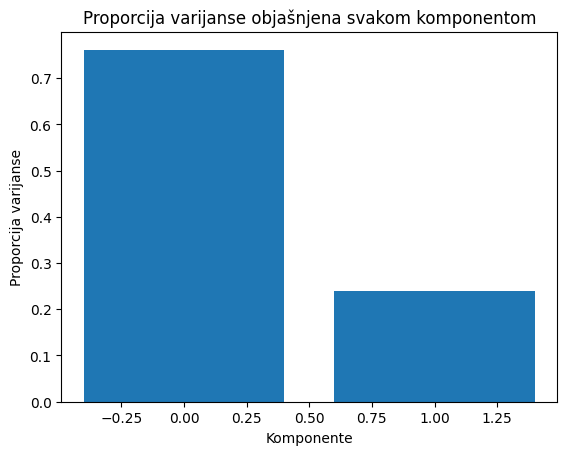

In [32]:
# Računanje proporcije varijanse
explained_variance = (s ** 2) / np.sum(s ** 2)

# Vizualizacija proporcija varijanse
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Komponente')
plt.ylabel('Proporcija varijanse')
plt.title('Proporcija varijanse objašnjena svakom komponentom')
plt.show()
